Project: African Financial Crisis

Name: Michael Lee

Date Started: 10/01/2025

Reason:

This is my first machine learning project that's not a tutorial. Since Finances will be my specialty, I want to create vizuals and utilize machine learning to analyze and predict the data given.

Questions:

Two questions I want to explore?

* What factors are most associated with banking crises across African countries?
* Given past crises in each country, can we forecast the likelhood of a crisis within the next decade?

## About this file
This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx

It specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

The dataset will be valuable to those who seek to understand the dynamics of financial stability within the African context.

In [29]:
# Prepare all libraries and imports for the library
import sklearn 
import numpy as np  # Math
import pandas as pd  # Read and pull tables
import matplotlib.pyplot as plt  # Provide low-level plotting
import plotly.express as px  # Interactive charts
import seaborn as sns  # Create pretty stat plots
import warnings  # Suppress library warning labels during exploring (not hiding errors)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)  # Set to true to load JS form Plotly's CDN - lighter and faster
%matplotlib inline

In [8]:
# Pull the data using Pandas
raw_df = pd.read_csv("african_crises.csv")
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [9]:
raw_df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [10]:
raw_df.isnull().sum()  # Count if we have any NAN in our raw data - the data looks clean which makes it easy.

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [11]:
# Let's first check how frequent banking crisis are in these countries (in proportions).
raw_df['banking_crisis'].value_counts(normalize=True)

banking_crisis
no_crisis    0.911237
crisis       0.088763
Name: proportion, dtype: float64

In [12]:
raw_df['banking_crisis'].value_counts(normalize=False)  # Raw count in frequency

banking_crisis
no_crisis    965
crisis        94
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x27b31bc5950>,
 [Text(0, 0, 'Crisis'), Text(1, 0, 'No Crisis')])

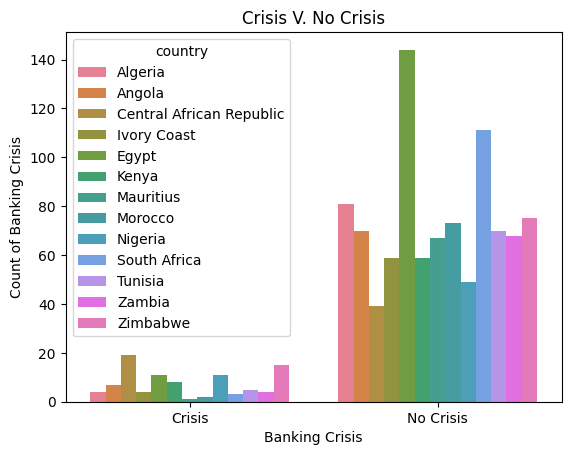

In [53]:
# Let's make a  figure to explore the number of crisis.
sns.countplot(data=raw_df,
            x='banking_crisis',
            hue='country')
plt.title('Crisis V. No Crisis')
plt.xlabel('Banking Crisis')
plt.ylabel('Count of Banking Crisis')
plt.xticks([0,1],['Crisis', 'No Crisis'])